# Part 2

This notebook includes a comparison of the performance of the selected models. It presents a table and a bar chart to visualize and compare the training and testing scores of these models using both BOW and TF-IDF representations.
We use these techniques and models to explore text classification, and the choice of representation and model depends on the specific goals and characteristics of the dataset. The comparison of the models provides insight into their relative performance for the task of classifying stress-related messages.

### Pre-processing

In [1]:

#Data Loading and Exploration

import numpy as np # linear algebra
import pandas as pd # data processing
import numpy as np # linear algebra

df = pd.read_csv("Stress.csv")

not_used_cols = ['subreddit','post_id','sentence_range','confidence','social_timestamp']
df1 = df.drop(not_used_cols,axis=1)
df1['label'].unique()
#Text processing

import nltk
import re
from urllib.parse import urlparse
#from spacy import load
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('omw-1.4') # Open Multilingual Wordnet, this is an lexical database
nltk.download('wordnet')
nltk.download('wordnet2022')
nltk.download('punkt')
nltk.download('stopwords')
print(df1.info)

<bound method DataFrame.info of                                                    text  label
0     He said he had not felt that way before, sugge...      1
1     Hey there r/assistance, Not sure if this is th...      0
2     My mom then hit me with the newspaper and it s...      1
3     until i met my new boyfriend, he is amazing, h...      1
4     October is Domestic Violence Awareness Month a...      1
...                                                 ...    ...
2833  * Her, a week ago: Precious, how are you? (I i...      0
2834  I don't have the ability to cope with it anymo...      1
2835  In case this is the first time you're reading ...      0
2836  Do you find this normal? They have a good rela...      0
2837  I was talking to my mom this morning and she s...      1

[2838 rows x 2 columns]>


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet2022 to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet2022 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
lemmatizer = WordNetLemmatizer()
stop_words = list(stopwords.words('english'))
def textProcess(sent):
    try:
        # Replace square brackets, parentheses with spaces
        sent = re.sub('[][)(]', ' ', sent)

        # Remove URLs by checking if a word has a URL scheme
        sent = [word for word in sent.split() if not urlparse(word).scheme]
        sent = ' '.join(sent)

        # Remove escape characters starting with '@'
        sent = re.sub(r'\@\w+', '', sent)

        # Remove HTML tags using regular expressions
        sent = re.sub(re.compile("<.*?>"), '', sent)

        # Keep only letters and numbers, replace others with spaces
        sent = re.sub("[^A-Za-z0-9]", ' ', sent)

        # Convert all words to lowercase
        sent = sent.lower()

        # Strip extra spaces from words and sentences
        sent = [word.strip() for word in sent.split()]
        sent = ' '.join(sent)

        # Tokenize the text into words
        tokens = word_tokenize(sent)

        # Remove stopwords (common words that don't carry much meaning)
        tokens = [word for word in tokens if word not in stop_words]

        # Lemmatize the words (convert words to their base form)
        sent = [lemmatizer.lemmatize(word) for word in tokens]
        sent = ' '.join(sent)

        return sent

    except Exception as ex:
        # Handle exceptions and print an error message
        print(sent, "\n")
        print("Error ", ex)


In [3]:
df1['processed_text'] = df1['text'].apply(lambda text: textProcess(text))
df1['processed_text'].info

<bound method Series.info of 0       said felt way suggeted go rest trigger ahead y...
1       hey r assistance sure right place post go curr...
2       mom hit newspaper shocked would know like play...
3       met new boyfriend amazing kind sweet good stud...
4       october domestic violence awareness month dome...
                              ...                        
2833    week precious ignored jan happy year precious ...
2834    ability cope anymore trying lot thing triggeri...
2835    case first time reading post looking people wi...
2836    find normal good relationship main problem see...
2837    talking mom morning said sister trauma worse m...
Name: processed_text, Length: 2838, dtype: object>

## BOW (Bag Of Word) / TF-IDF


### Bag of Words (BOW):

BOW is a straightforward and effective method for text classification with a quickly understand of the word frequency distribution in documents, which is essential for our classification task. BOW identifying important keywords in documents, aiding our content comprehension by highlighting key terms.

In [4]:
lemmatizer = WordNetLemmatizer()
stop_words = list(stopwords.words('english'))
def textProcess(sent):
    try:
        # Replace square brackets, parentheses with spaces
        sent = re.sub('[][)(]', ' ', sent)

        # Remove URLs by checking if a word has a URL scheme
        sent = [word for word in sent.split() if not urlparse(word).scheme]
        sent = ' '.join(sent)

        # Remove escape characters starting with '@'
        sent = re.sub(r'\@\w+', '', sent)

        # Remove HTML tags using regular expressions
        sent = re.sub(re.compile("<.*?>"), '', sent)

        # Keep only letters and numbers, replace others with spaces
        sent = re.sub("[^A-Za-z0-9]", ' ', sent)

        # Convert all words to lowercase
        sent = sent.lower()

        # Strip extra spaces from words and sentences
        sent = [word.strip() for word in sent.split()]
        sent = ' '.join(sent)

        # Tokenize the text into words
        tokens = word_tokenize(sent)

        # Remove stopwords (common words that don't carry much meaning)
        tokens = [word for word in tokens if word not in stop_words]

        # Lemmatize the words (convert words to their base form)
        sent = [lemmatizer.lemmatize(word) for word in tokens]
        sent = ' '.join(sent)

        return sent

    except Exception as ex:
        # Handle exceptions and print an error message
        print(sent, "\n")
        print("Error ", ex)


In [5]:
df1['processed_text'] = df1['text'].apply(lambda text: textProcess(text))

# Part 2

Bag of Words (BOW):

BOW is a straightforward and effective method for text classification with a quickly understand of the word frequency distribution in documents, which is essential for our classification task. BOW identifying important keywords in documents, aiding our content comprehension by highlighting key terms.

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
MIN_DF = 1
# min_df is used for removing terms that appear too infrequently.
# For example: min_df = 0.01 means "ignore terms that appear in less than 1% of the documents".
cv = CountVectorizer(min_df=MIN_DF)
cv_df = cv.fit_transform(df1['processed_text'])
cv_df.toarray()

cv_df = pd.DataFrame(cv_df.toarray(),columns=cv.get_feature_names_out())
cv_df.head(3)

,00,000,02,06,10,100,1000,100kg,100mg,100x,...,zines,zinsser,zip,zofran,zoloft,zombie,zone,zoo,zuko,zumba
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Term Frequency-Inverse Document Frequency (TF-IDF):


TF-IDF addresses this by giving higher scores to words that are frequent in a specific document but rare across the entire corpus.
That helps emphasize discriminative terms for classification and reduces the impact of common words like "the" and "and."

TF-IDF (Term frequency - inverse document frequency)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(min_df=MIN_DF)
tf_df = tf.fit_transform(df1['processed_text'])
tf_df.toarray()


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
tf_df = pd.DataFrame(tf_df.toarray(),columns=tf.get_feature_names_out())
tf_df.head(3)

,00,000,02,06,10,100,1000,100kg,100mg,100x,...,zines,zinsser,zip,zofran,zoloft,zombie,zone,zoo,zuko,zumba
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
tf_df.describe()

,00,000,02,06,10,100,1000,100kg,100mg,100x,...,zines,zinsser,zip,zofran,zoloft,zombie,zone,zoo,zuko,zumba
count,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,...,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000
mean,0.000176,0.000570,0.000112,0.000074,0.003420,0.001897,0.000607,0.000106,0.000122,0.000071,...,0.000080,0.000074,0.000212,0.000081,0.000748,0.000136,0.000257,0.000094,0.000058,0.000040
std,0.006641,0.010400,0.005943,0.003941,0.022159,0.018407,0.011747,0.005624,0.004854,0.003765,...,0.004252,0.003921,0.008125,0.004293,0.012308,0.005144,0.007226,0.004999,0.003113,0.002135
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.265556,0.337824,0.316593,0.209957,0.277953,0.298782,0.324070,0.299611,0.231738,0.200569,...,0.226519,0.208890,0.357795,0.228713,0.314832,0.201190,0.286642,0.266303,0.165859,0.113743


In [10]:
cv_df.shape,tf_df.shape

((2838, 10140), (2838, 10140))

### Choose the best model

Each case explores a different combination of model and feature representation.

The choice between models and representations may depend on the specific characteristics of our data and the trade-off between simplicity and complexity in the model.

BOW treats all words equally, including common ones that may not be informative for classification.


In [11]:
# Import necessary libraries and modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(cv_df, df1['label'], stratify=df1['label'])


 Logistic Regression is chosen for its simplicity and interpretability. Bag of Words (BOW) representation is used, which creates a vocabulary of words and encodes each document as a vector of word counts.

In [12]:
# Initialize the models and train them
# Logistic Regression with BOW
model_lr_bow = LogisticRegression()
model_lr_bow.fit(X_train, y_train)


LogisticRegression()

In [13]:
# Evaluate the models on the test set
# Logistic Regression with BOW
lr_bow_train_score = model_lr_bow.score(X_train, y_train)
lr_bow_test_score = model_lr_bow.score(X_test, y_test)

print(lr_bow_train_score)
print(lr_bow_test_score)

0.9967105263157895
0.7281690140845071


Naive Bayes is selected for its effectiveness in handling text data. It's also based on the BOW representation, Naive Bayes makes strong independence assumptions between features, which can work well with BOW. It's computationally efficient and often used in text classification tasks.

In [14]:
# Naive Bayes with BOW
model_nb_bow = MultinomialNB()
model_nb_bow.fit(X_train, y_train)
# Scores
nb_bow_train_score = model_nb_bow.score(X_train, y_train)
nb_bow_test_score = model_nb_bow.score(X_test, y_test)


Random Forest is a more complex model capable of capturing non-linear relationships in the data with BOW features that can capture intricate patterns in text data and provide better generalization by aggregating multiple decision trees.

In [15]:
# Random Forest with BOW
model_rf_bow = RandomForestClassifier()
model_rf_bow.fit(X_train, y_train)

RandomForestClassifier()

In [16]:

# Random Forest with BOW
rf_bow_train_score = model_rf_bow.score(X_train, y_train)
rf_bow_test_score = model_rf_bow.score(X_test, y_test)


TF-IDF


Term Frequency-Inverse Document Frequency (TF-IDF):

BOW treats all words equally, including common ones that may not be informative for classification.
TF-IDF addresses this by giving higher scores to words that are frequent in a specific document but rare across the entire corpus.
That helps emphasize discriminative terms for classification and reduces the impact of common words like "the" and "and."

In [17]:

# Repeat the same steps for TF-IDF
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tf_df, df1['label'], stratify=df1['label'])


Logistic Regression with the Term Frequency-Inverse Document Frequency (TF-IDF) representation.
TF-IDF assigns weights to words based on their importance that can highlight the significance of words in documents, and Logistic Regression can efficiently handle these weighted features.

In [18]:
# Logistic Regression with TF-IDF
model_lr_tfidf = LogisticRegression()
model_lr_tfidf.fit(X_train_tfidf, y_train_tfidf)
# Evaluate the models on the test set
# Logistic Regression with TF-IDF
lr_tfidf_train_score = model_lr_tfidf.score(X_train_tfidf, y_train_tfidf)
lr_tfidf_test_score = model_lr_tfidf.score(X_test_tfidf, y_test_tfidf)


Naive Bayes with TF-IDF is a robust choice when considering term importance.
Very useful when certain words are more informative.

In [19]:
# Naive Bayes with TF-IDF
model_nb_tfidf = MultinomialNB()
model_nb_tfidf.fit(X_train_tfidf, y_train_tfidf)

# Naive Bayes with TF-IDF
nb_tfidf_train_score = model_nb_tfidf.score(X_train_tfidf, y_train_tfidf)
nb_tfidf_test_score = model_nb_tfidf.score(X_test_tfidf, y_test_tfidf)


Random Forest is used with TF-IDF features for its ability to handle high-dimensional data and can effectively exploit the weighted word features provided by TF-IDF.

In [20]:
# Random Forest with TF-IDF
model_rf_tfidf = RandomForestClassifier()
model_rf_tfidf.fit(X_train_tfidf, y_train_tfidf)
# Random Forest with TF-IDF
rf_tfidf_train_score = model_rf_tfidf.score(X_train_tfidf, y_train_tfidf)
rf_tfidf_test_score = model_rf_tfidf.score(X_test_tfidf, y_test_tfidf)

Comparaison between all model choosen

In [21]:
import pandas as pd

# Create a dictionary with the model names and their respective scores
scores_data = {
    'Model': ['Logistic Regression with BOW', 'Naive Bayes with BOW', 'Random Forest with BOW',
              'Logistic Regression with TF-IDF', 'Naive Bayes with TF-IDF', 'Random Forest with TF-IDF'],
    'Train Score (BOW)': [lr_bow_train_score, nb_bow_train_score, rf_bow_train_score, 0, 0, 0],
    'Test Score (BOW)': [lr_bow_test_score, nb_bow_test_score, rf_bow_test_score, 0, 0, 0],
    'Train Score (TF-IDF)': [0, 0, 0, lr_tfidf_train_score, nb_tfidf_train_score, rf_tfidf_train_score],
    'Test Score (TF-IDF)': [0, 0, 0, lr_tfidf_test_score, nb_tfidf_test_score, rf_tfidf_test_score]
}

# Create a Pandas DataFrame
scores_df = pd.DataFrame(scores_data)

# Display the comparison table
print(scores_df)


                             Model  Train Score (BOW)  Test Score (BOW)  \
0     Logistic Regression with BOW           0.996711          0.728169   
1             Naive Bayes with BOW           0.926222          0.747887   
2           Random Forest with BOW           0.998120          0.728169   
3  Logistic Regression with TF-IDF           0.000000          0.000000   
4          Naive Bayes with TF-IDF           0.000000          0.000000   
5        Random Forest with TF-IDF           0.000000          0.000000   

   Train Score (TF-IDF)  Test Score (TF-IDF)  
0              0.000000             0.000000  
1              0.000000             0.000000  
2              0.000000             0.000000  
3              0.914474             0.729577  
4              0.863252             0.695775  
5              0.999060             0.688732  


Now we need to Visualize to choose best model to conitnue

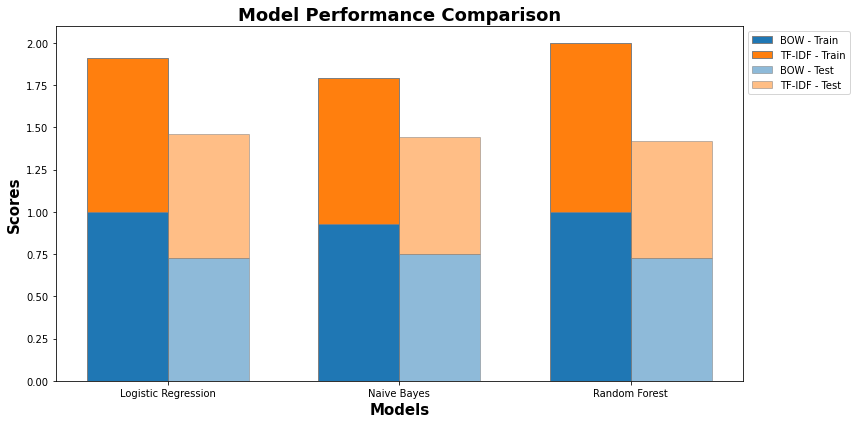

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the bar chart
models = ['Logistic Regression', 'Naive Bayes', 'Random Forest']
bow_train_scores = [lr_bow_train_score, nb_bow_train_score, rf_bow_train_score]
bow_test_scores = [lr_bow_test_score, nb_bow_test_score, rf_bow_test_score]
tfidf_train_scores = [lr_tfidf_train_score, nb_tfidf_train_score, rf_tfidf_train_score]
tfidf_test_scores = [lr_tfidf_test_score, nb_tfidf_test_score, rf_tfidf_test_score]

# Bar width
bar_width = 0.35
index = np.arange(len(models))

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Training Scores
ax.bar(index - bar_width/2, bow_train_scores, color='#1f77b4', width=bar_width, edgecolor='grey', label='BOW - Train')
ax.bar(index - bar_width/2, tfidf_train_scores, bottom=bow_train_scores, color='#ff7f0e', width=bar_width, edgecolor='grey', label='TF-IDF - Train')

# Testing Scores
ax.bar(index + bar_width/2, bow_test_scores, color='#1f77b4', width=bar_width, edgecolor='grey', label='BOW - Test', alpha=0.5)
ax.bar(index + bar_width/2, tfidf_test_scores, bottom=bow_test_scores, color='#ff7f0e', width=bar_width, edgecolor='grey', label='TF-IDF - Test', alpha=0.5)

# Customize the chart
ax.set_xlabel('Models', fontweight='bold', fontsize=15)
ax.set_ylabel('Scores', fontweight='bold', fontsize=15)
ax.set_title('Model Performance Comparison', fontweight='bold', fontsize=18)
ax.set_xticks(index)
ax.set_xticklabels(models)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()


Best Test model is Linear Regression with TF-IDF, that porve it's important to search because any models can be the best, that depend with th e context, a simple linear regression is here the most powerful with a difficult problematic than recognize stress.

## Now we can visualize the first prediction with a confusion matrix

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

In [24]:
# Logistic Regression with TF-IDF
model_lr_tfidf = LogisticRegression()
model_lr_tfidf.fit(X_train_tfidf, y_train_tfidf)
# Evaluate the models on the test set
# Logistic Regression with TF-IDF
lr_tfidf_train_score = model_lr_tfidf.score(X_train_tfidf, y_train_tfidf)
lr_tfidf_test_score = model_lr_tfidf.score(X_test_tfidf, y_test_tfidf)

In [25]:
from sklearn.metrics import confusion_matrix

# Assuming y_test_tfidf contains the true labels
y_pred = model_lr_tfidf.predict(X_test_tfidf)
cm = confusion_matrix(y_test_tfidf, y_pred)
print(cm)


[[243  95]
 [ 97 275]]


This is not perfect because stress is difficult to detect

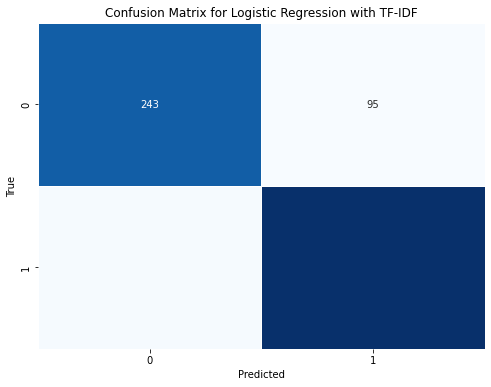

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)

# Set labels and title
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Logistic Regression with TF-IDF")

# Display the plot
plt.show()


Now we can see our model can be effective, stress is a sentiment very difficult to sent for machine. Predictions are now possible with our best model, we can be more effective with deep learning, we can expect best results.

In [27]:

# Check the classification report
print(classification_report(y_test_tfidf, y_pred))


              precision    recall  f1-score   support

           0       0.71      0.72      0.72       338
           1       0.74      0.74      0.74       372

    accuracy                           0.73       710
   macro avg       0.73      0.73      0.73       710
weighted avg       0.73      0.73      0.73       710



Classificatication report help to provides you with a detailed breakdown of how well your model is doing in terms of precision, recall, and F1-score for each class in your dataset.

  **Precision:** This is like the accuracy of your model when it claims to have found something. If it predicts a positive (e.g., spam email), precision tells you how many times it was actually correct.

 **Recall (Sensitivity):** This is about not missing out on positives. It tells you how many of the actual positives your model managed to capture.

  **F1-Score:** This is a balance between precision and recall. Sometimes, you might have a really high precision but low recall or vice versa. F1-score gives you a single number that balances these two aspects.

  **Support:** This is the number of actual occurrences of each class in your dataset. It gives you an idea of how common each class is.

# Prediction

We train a logistic regression model on TF-IDF data to predict stress. The stress_predictor function processes text, transforms it into TF-IDF features, and predicts stress.


In [28]:
# Train the logistic regression model on the TF-IDF representation
logistic_regression_model = LogisticRegression().fit(tf_df, df1['label'])

# Check the overall accuracy of the model on the training data
accuracy = logistic_regression_model.score(tf_df, df1['label'])
print(f"Model Accuracy: {accuracy}")

# Define a function for making predictions
def stress_predictor(text):
    processed = textProcess(text)
# Transform the processed text using the TF-IDF vectorizer
    embedded_words = tf.transform([text])
    res = model_lr_tfidf.predict(embedded_words)
# Interpret the prediction result and provide a human-readable response
    if res[0] == 1:
        res = "stress detected"
    else:
        res = "no stress"
    return res


Model Accuracy: 0.9059196617336153


The result is returned as avery good score.


## Now go test with some text, i test with job situation

In [29]:
text1 = """Work today was tough. Dealing with unexpected challenges and tight deadlines.
The pressure is on, and it's affecting my performance."""
text2 = """Had a challenging day at work, but I managed to handle it well.
Received positive feedback, boosting my confidence."""
text3 = """The workload is piling up, and the constant pressure from the boss is overwhelming.
I'm not sure how much longer I can handle this."""
text4 = """Finished my tasks early today. Enjoying a sense of accomplishment and looking forward to a relaxing evening."""
text5 = """
A:Hey, Sarah. The brainstorming session today was intense, huh?

B:Yeah, Mark. Intense is one word for it. It feels like the pressure is on to deliver something groundbreaking.

A:Exactly. The expectations are high, and we need to step up. There's a lot riding on this project.

A:I can't shake off this feeling of unease. What if we miss something important? The stakes seem so high.

B:I get it, Sarah. But pressure can sometimes bring out the best in us. Let's channel that stress into motivation.

A:I hope so, Mark. I just worry that we're juggling too much. The workload is starting to feel overwhelming.

B:It's natural to feel that way. Let's take it one step at a time and lean on each other for support. We got this!
"""

In [30]:
textProcess(text1)

'work today tough dealing unexpected challenge tight deadline pressure affecting performance'

In [31]:
print(stress_predictor(text1))
print(stress_predictor(text2))
print(stress_predictor(text3))
print(stress_predictor(text4))
print(stress_predictor(text5))

no stress
no stress
stress detected
no stress
no stress


C:\Users\nicol\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


The key takeaway is the significance of aligning algorithm selection with the unique characteristics of the problem at hand.
This exploration underscores the nuanced interplay between algorithms and performance, offering valuable insights for fellow students venturing into machine learning projects.

# Conclusion

In conclusion, The exploration encompassed Bag of Words (BOW) and Term Frequency-Inverse Document Frequency (TF-IDF) methods, coupled with models like Logistic Regression, Naive Bayes, and Random Forest. Notably, the Random Forest algorithm didn't necessarily yield superior results, emphasizing the significance of algorithm selection based on the unique characteristics of the problem.

Looking ahead, an exciting avenue for further exploration involves delving into deep learning techniques, particularly using PyTorch. The transition to deep learning could unlock the potential for capturing intricate patterns and dependencies within textual data, enhancing the model's ability to discern nuanced emotions and stress indicators. This foray into deep learning represents a promising extension of the stress detection project, offering a more sophisticated approach for future enhancements.

Nicolas WATTENHOFFER